In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Условие 1: Задача 1
* Постройте график
* Назовите график
* Сделайте именование оси x и оси y
* Сделайте выводы

#### 1.1. Скачать данные (недвижимость)

In [2]:
df = pd.read_csv("./kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


#### 1.2 Изучите стоимости недвижимости

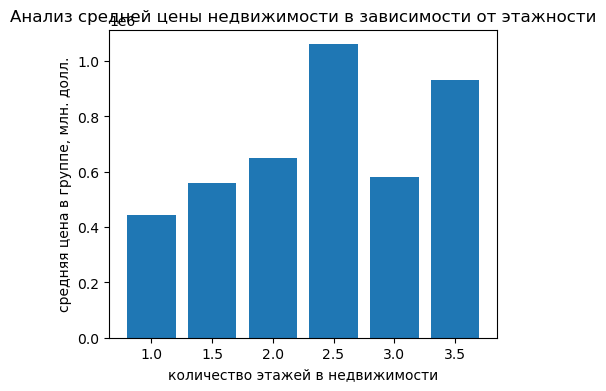

In [3]:
data = df.groupby("floors").price.mean()
plt.figure(figsize=(5, 4))
plt.bar(data.index, data.values, width=0.4)
plt.title('Анализ средней цены недвижимости в зависимости от этажности')
plt.xlabel('количество этажей в недвижимости')
plt.ylabel('средняя цена в группе, млн. долл.');

#### выводы:
* дома с этажностью 2,5 продаются выше средней стоимости по рынку;
* дома с этажностью 3.0 продаются ниже средней стоимости по рынку;

#### 1.3 Изучите распределение квадратуры жилой

In [4]:
step = 1500
x_row = [0]
y_row = [0]
current = x_row[0]
stop = df.sqft_living.max()
while current < stop:
    y_row.append(df[(df.sqft_living < current + step) &  (df.sqft_living >= current)].shape[0])
    current += step
    x_row.append(current)

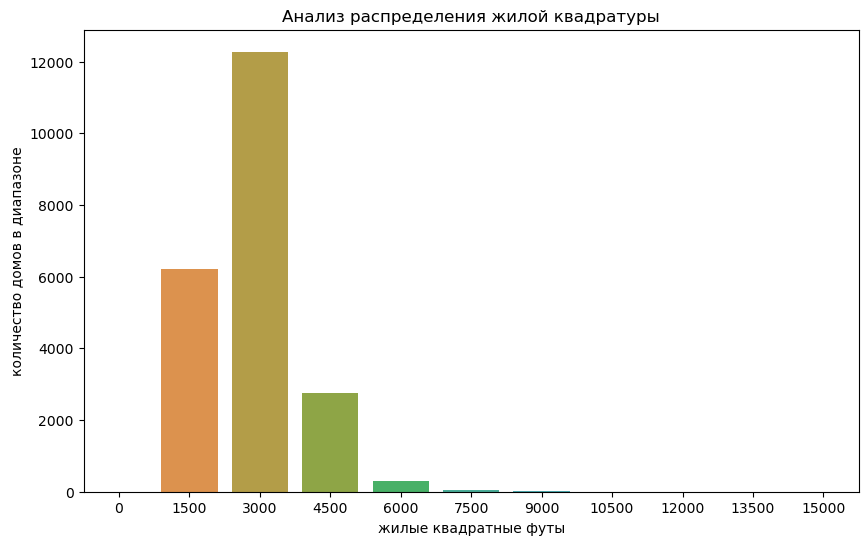

In [5]:
plt.figure(figsize=(10, 6))
sns.barplot(x=x_row, y=y_row)
plt.title('Анализ распределения жилой квадратуры')
plt.xlabel("жилые квадратные футы")
plt.ylabel('количество домов в диапазоне');

#### Выводы:
* основная масса домов находится в зоне с площадью от 1500 до 3000 квадратных футов.

#### 1.4 Изучите распределение года постройки

In [9]:
data = pd.Series({
    "1900-1909": df[(df.yr_built < 1910)].shape[0],
    "1910-1919":df[(df.yr_built <= 1910) & (df.yr_built < 1920)].shape[0],
    "1920-1929":df[(df.yr_built <= 1920) & (df.yr_built < 1930)].shape[0],
    "1930-1939":df[(df.yr_built <= 1930) & (df.yr_built < 1940)].shape[0],
    "1940-1949":df[(df.yr_built <= 1940) & (df.yr_built < 1950)].shape[0],
    "1950-1959":df[(df.yr_built <= 1950) & (df.yr_built < 1960)].shape[0],
    "1960-1969":df[(df.yr_built <= 1960) & (df.yr_built < 1970)].shape[0],
    "1970-1979":df[(df.yr_built <= 1970) & (df.yr_built < 1980)].shape[0],
    "1980-1989":df[(df.yr_built <= 1980) & (df.yr_built < 1990)].shape[0],
    "1990-1999":df[(df.yr_built <= 1990) & (df.yr_built < 2000)].shape[0],
    "2000-2009": df[(df.yr_built >= 2000) & (df.yr_built < 2010)].shape[0],
    "2010-2015":df[(df.yr_built <= 2010)].shape[0],
})

1900-1909      645
1910-1919      779
1920-1929     1549
1930-1939     2733
1940-1949     3329
1950-1959     5187
1960-1969     7637
1970-1979    10181
1980-1989    12574
1990-1999    14936
2000-2009     3518
2010-2015    20515
dtype: int64

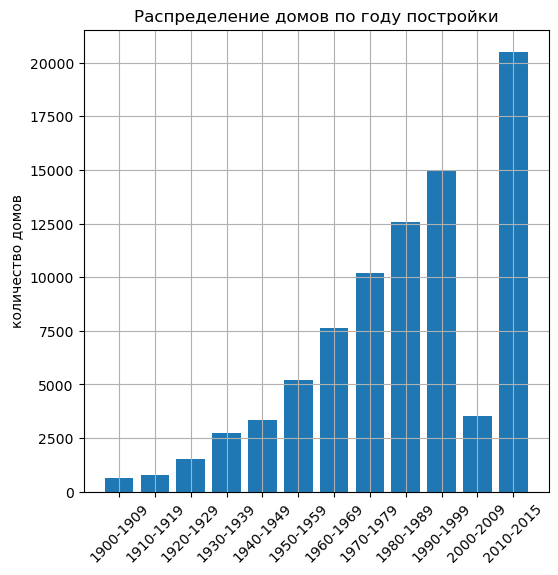

In [15]:
plt.figure(figsize=(6, 6))
plt.bar(data.index, data.values)
plt.ylabel("количество домов")
plt.title('Распределение домов по году постройки')
plt.xticks(rotation=45)
plt.grid();

#### выводы:
* увеличение строительства домов наблюдается по экпоненте
* большая доля домов для продажи младше 50 лет
* очень малая доля домов с первого десятилетия 21 века. видимо, в период кризиса много строек было заморожено.

#### 2.1 Изучите распределение домов от наличия вида на набережную

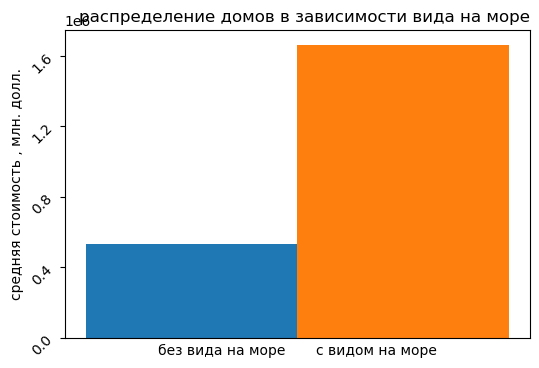

In [42]:
data = df.groupby("waterfront").price.mean().astype("int")
plt.figure(figsize=(6,4))
n_ticks = np.arange(1)
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data[0], width=w)
plt.bar(n_ticks + offset, data[1], width=w)
plt.title("распределение домов в зависимости вида на море", loc="right")
plt.xlabel("без вида на море       с видом на море")
plt.tick_params(bottom=False, labelbottom=False)
plt.yticks([0, 400000, 800000, 1200000, 1600000], rotation=45)
plt.ylabel("средняя стоимость , млн. долл.");

#### выводы:
* стоимость домов с видом на набережную выше остальных более чем в два раза

#### 2.2 Изучите распределение этажей домов
######  как раз этажность домов у меня рассмотрена в задании 1.2

#### 2.3 Изучите распределение состояния домов

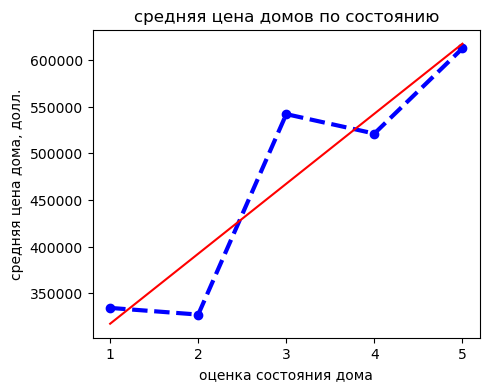

In [64]:
data = df.groupby("condition").price.mean()
plt.figure(figsize=(5, 4))
plt.plot(data.index, data.values, "bo--", linewidth=3)
plt.title("средняя цена домов по состоянию")
plt.xlabel("оценка состояния дома")
plt.xticks([1, 2, 3, 4, 5])
plt.ylabel("средняя цена дома, долл.")
z = np.polyfit(data.index, data.values, 1)
p = np.poly1d(z)
plt.plot(data.index, p(data.index), color="red");

#### выводы:
* чем лучше состояние дома, тем выше его цена;
* дома с оценками 2 и 4 продаются дешевле, чем с 1 и 3 соответственно

#### Условие 3: 3 задача
* Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
* Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

#### так как эти задания я считаю, что выполнил, выполняя предыдущие задачи, я выполню его немножко по-своему

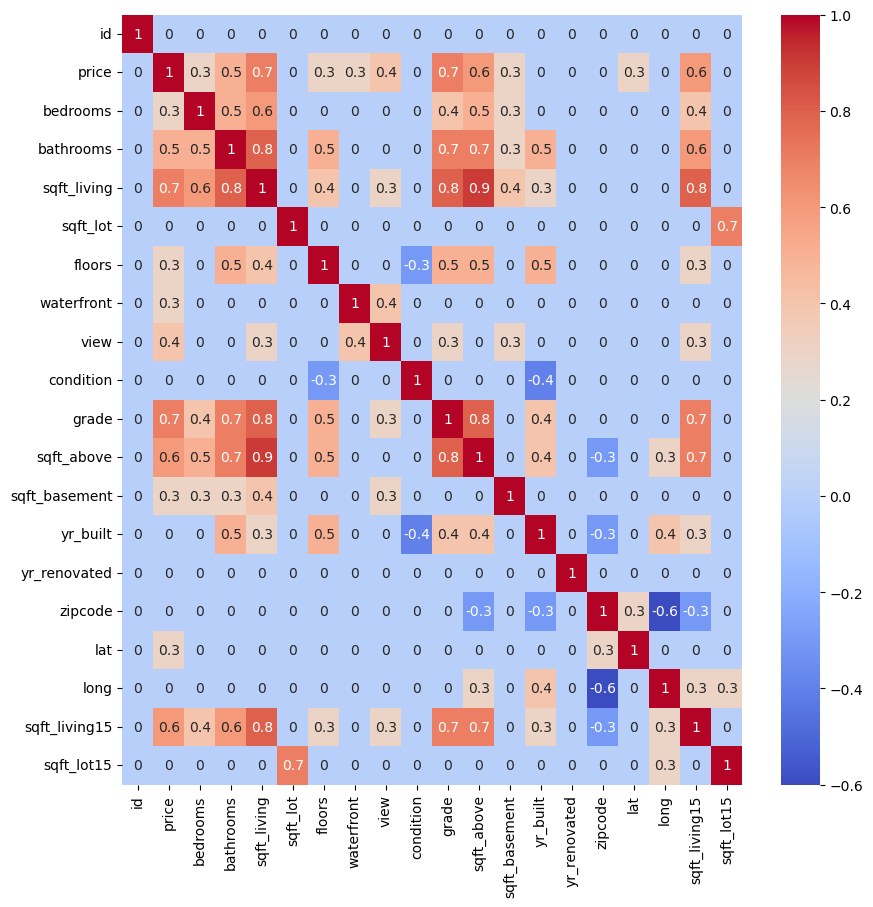

In [126]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm");

#### из тепловой карты видно, что с ценой коррелируют 5 показателей, построим их графики

In [120]:
def new_plot(x_data):
    y_data = df.price.values
    plt.scatter(x_data, y)
    x_mean, y_mean = np.mean(x_data), np.mean(y_data)
    beta = np.sum((x_data - x_mean) * (y_data - y_mean)) / np.sum((x_data - x_mean)**2)
    alpha = y_mean - beta * x_mean
    y_hat = alpha + beta * x_data
    plt.plot(x_data, y_hat, color="red");

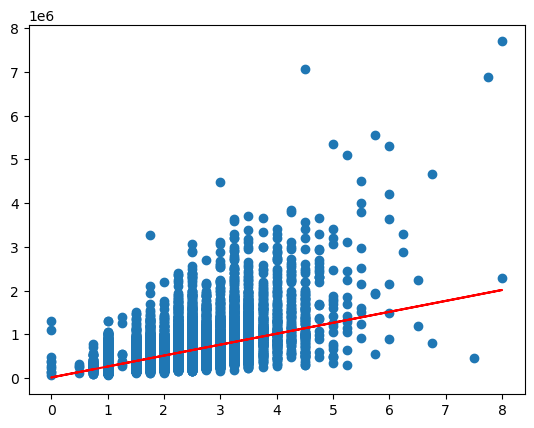

In [121]:
new_plot(df.bathrooms.values)

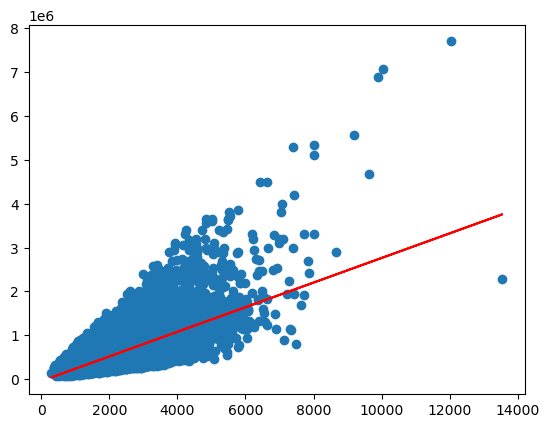

In [122]:
new_plot(df.sqft_living.values)

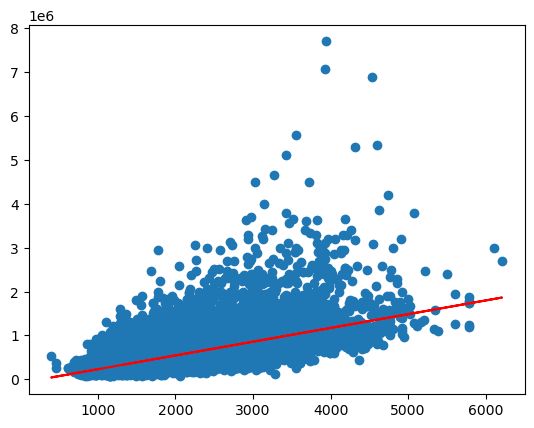

In [123]:
new_plot(df.sqft_living15.values)

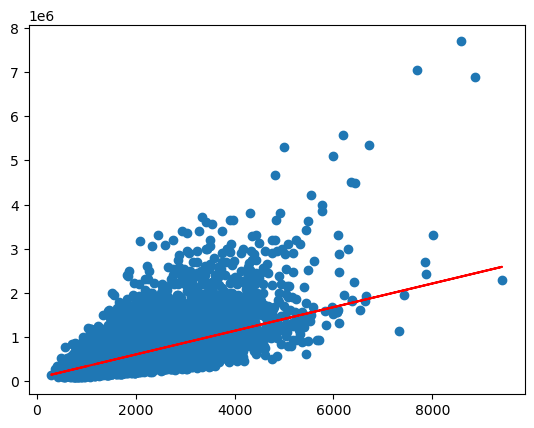

In [124]:
new_plot(df.sqft_above.values)

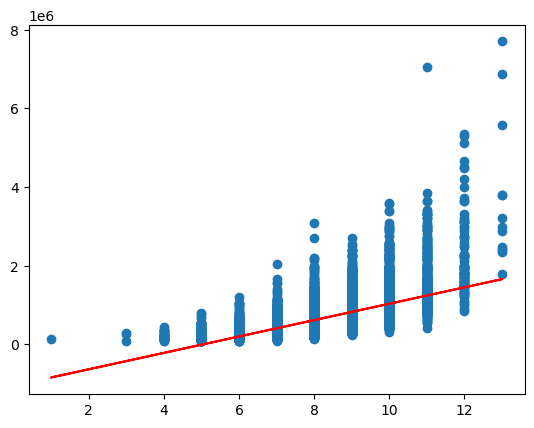

In [125]:
new_plot(df.grade.values)

#### Выводы:
* исходя из анализа датафрейма можно сказать, что цена недвижимости зависит от жилой площади и от оценочного балла
* в чуть меньшей степени цена недвижимости зависит от количества ванных комнат в недвижимости. 